In [1]:
import random
import asyncio
import copy
import numpy as np
from itertools import combinations, product, permutations
from math import exp
from matplotlib import pyplot as plt

In [2]:
def bool_function(x1, x2, x3, x4: bool) -> int:
    return int(not ((x1 and x2) or x3 or x4))

In [3]:
def threshold_function(net):
    return 1 if net >= 0. else 0

In [4]:
def logistic_function(net):
    return 1. / (1. + exp(-net))

In [5]:
def derivative_logistic_function(net):
    return logistic_function(net) * (1 - logistic_function(net))

In [6]:
def hamming(y_true, y_pred):
    return sum([abs(yt - yp) for yt, yp in zip(y_true, y_pred)])

In [7]:
class Perceptron: 
    def __init__(self, activation, derivative, alpha=0.3):
        self.w = [0. for _ in range(5)]
        self.activation = activation
        self.derivative = derivative
        self.alpha = alpha
        
    def fit(self, X, y):
        for x, gt in zip(X, y):
            net = sum([x[i]*self.w[i] for i in range(len(x))])
            sigma = gt - int(round(self.activation(net)))

            if sigma != 0:
                for i in range(len(x)):
                    self.w[i] += self.alpha*sigma*self.derivative(net)*x[i]

    def predict(self, X):
        y_pred = [0]*len(X)
        for n, x in enumerate(X): 
            net = sum([x[i]*self.w[i] for i in range(len(x))])
            y_pred[n] = int(round(self.activation(net)))
            
        return y_pred

======== EPOCH [1] ========
Weights: [0.0, 0.0, 0.0, 0.0, 0.0]
Out: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Error: 3
======== EPOCH [2] ========
Weights: [-0.3, 0.0, 0.0, -0.3, -0.6]
Out: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Error: 3
======== EPOCH [3] ========
Weights: [-0.3, -0.3, -0.3, -0.3, -0.6]
Out: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Error: 2
======== EPOCH [4] ========
Weights: [0.0, -0.3, -0.6, -0.6, -0.6]
Out: [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Error: 0


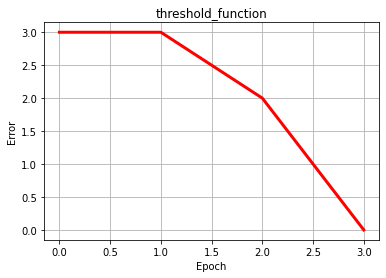

In [8]:
nn = Perceptron(threshold_function, lambda _: 1)
epoch = 0
errors = []
notComplete = True

X = [[1] + list(item) for item in product([0, 1], repeat=4)]
y = [bool_function(*vec[1:]) for vec in X]

while notComplete and epoch < 100:
    epoch += 1
    notComplete = False
    inds = range(len(X))
    print(f'======== EPOCH [{epoch}] ========')
    print(f'Weights: {[round(w, 3) for w in nn.w]}')
    nn.fit([X[i] for i in inds], [y[i] for i in inds])
    pred_y = nn.predict(X)
    error = hamming(y, pred_y)
    print(f'Out: {pred_y}')
    notComplete = (error != 0)
    errors.append(error)
    print(f'Error: {error}')
    
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title(threshold_function.__name__)
plt.grid(True)
plt.plot(range(epoch), errors, color='red', lw=3)
plt.show()

======== EPOCH [1] ========
Weights: [0.0, 0.0, 0.0, 0.0, 0.0]
Out: [0, 0, 0, 0]
Error: 2
======== EPOCH [2] ========
Weights: [-0.3, -0.3, -0.3, -0.3, -0.3]
Out: [0, 0, 0, 0]
Error: 2
======== EPOCH [3] ========
Weights: [0.0, -0.3, -0.3, -0.3, -0.3]
Out: [0, 1, 1, 0]
Error: 0


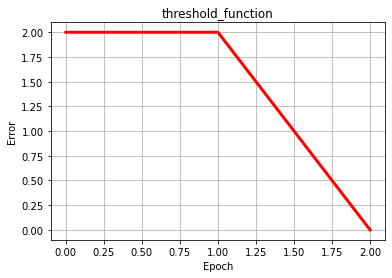

In [24]:
nn = Perceptron(threshold_function, lambda _: 1)
epoch = 0
errors = []
notComplete = True

X_best = [[1, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 1, 1]]
X_best = [[1] + list(item) for item in X_best]
y_best = [bool_function(*vec[1:]) for vec in X_best]

while notComplete and epoch < 100:
    epoch += 1
    notComplete = False
    print(f'======== EPOCH [{epoch}] ========')
    print(f'Weights: {[round(w, 3) for w in nn.w]}')
    inds = random.sample(range(len(X_best)), k=len(X_best))
    nn.fit([X_best[i] for i in inds], [y_best[i] for i in inds])
    pred_y = nn.predict(X_best)
    print(f'Out: {pred_y}')
    error = hamming(y_best, pred_y)
    notComplete = (error != 0)
    errors.append(error)
    
    print(f'Error: {error}')
    
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title(threshold_function.__name__)
plt.grid(True)
plt.plot(range(epoch), errors, color='red', lw=3)
plt.show()

======== EPOCH [1] ========
Weights: [0.0, 0.0, 0.0, 0.0, 0.0]
Out: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Error: 3
======== EPOCH [2] ========
Weights: [-0.075, -0.0, -0.075, -0.075, -0.15]
Out: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Error: 3
======== EPOCH [3] ========
Weights: [-0.0, -0.075, -0.075, -0.075, -0.15]
Out: [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Error: 0


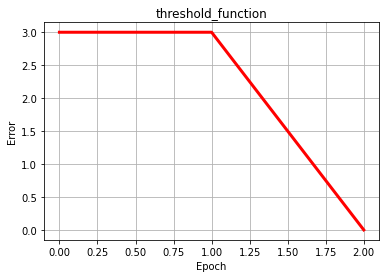

In [25]:
nn = Perceptron(logistic_function, derivative_logistic_function)
epoch = 0
errors = []
notComplete = True

X = [[1] + list(item) for item in product([0, 1], repeat=4)]
y = [bool_function(*vec[1:]) for vec in X]

while notComplete and epoch < 100:
    epoch += 1
    notComplete = False
    print(f'======== EPOCH [{epoch}] ========')
    print(f'Weights: {[round(w, 3) for w in nn.w]}')
    inds = range(len(X))
    nn.fit([X[i] for i in inds], [y[i] for i in inds])
    pred_y = nn.predict(X)
    print(f'Out: {pred_y}')
    error = hamming(y, pred_y)
    notComplete = (error != 0)
    errors.append(error)
    print(f'Error: {error}')
    
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title(threshold_function.__name__)
plt.grid(True)
plt.plot(range(epoch), errors, color='red', lw=3)
plt.show()

======== EPOCH [1] ========
Weights: [0.0, 0.0, 0.0, 0.0, 0.0]
Out: [0, 0, 0, 0, 0]
Error: 2
======== EPOCH [2] ========
Weights: [0.0, -0.075, -0.074, -0.075, -0.075]
Out: [0, 0, 1, 1, 0]
Error: 0


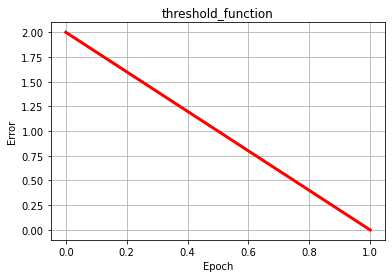

In [68]:
nn = Perceptron(logistic_function, derivative_logistic_function)
epoch = 0
errors = []
notComplete = True

X_best = [[1, 1, 1, 1], [1, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 1, 1]]
X_best = [[1] + list(item) for item in X_best]
y_best = [bool_function(*vec[1:]) for vec in X_best]

while notComplete and epoch < 100:
    epoch += 1
    notComplete = False
    print(f'======== EPOCH [{epoch}] ========')
    print(f'Weights: {[round(w, 3) for w in nn.w]}')
    inds = random.sample(range(len(X_best)), k=len(X_best))
    nn.fit([X_best[i] for i in inds], [y_best[i] for i in inds])
    pred_y = nn.predict(X_best)
    print(f'Out: {pred_y}')
    error = hamming(y_best, pred_y)
    notComplete = (error != 0)
    errors.append(error)
    print(f'Error: {error}')
    
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title(threshold_function.__name__)
plt.grid(True)
plt.plot(range(epoch), errors, color='red', lw=3)
plt.show()